# MA598 HW 1

### Guangtong Shen
### Fall 2016

## Dataset Description

1. Title: Pima Indians Diabetes Database

2. Number of Instances: 768

3. Number of Attributes: 8 plus class 

4. For Each Attribute: (all numeric-valued)
   1. Number of times pregnant
   2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test
   3. Diastolic blood pressure (mm Hg)
   4. Triceps skin fold thickness (mm)
   5. 2-Hour serum insulin (mu U/ml)
   6. Body mass index (weight in kg/(height in m)^2)
   7. Diabetes pedigree function
   8. Age (years)
   9. Class variable (0 or 1)

5. Missing Attribute Values: Yes

6. Class Distribution: (class value 1 is interpreted as "tested positive for
   diabetes")

   Class Value  Number of instances
   0            500
   1            268

7. Brief statistical analysis:

    Attribute number:    Mean:   Standard Deviation:
    1.                     3.8     3.4
    2.                   120.9    32.0
    3.                    69.1    19.4
    4.                    20.5    16.0
    5.                    79.8   115.2
    6.                    32.0     7.9
    7.                     0.5     0.3
    8.                    33.2    11.8

## Tast 1 . Acquire Data

Use PCA to find main components with variance explained by 95%


In [2]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.mixture import GMM
from sklearn.mixture import VBGMM
from sklearn.mixture import DPGMM

from sklearn import metrics


#auxilliary
from scipy import stats
import matplotlib.pyplot as plt
import math

%matplotlib inline
# plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
# plt.rcParams['image.interpolation'] = 'nearest'
# plt.rcParams['image.cmap'] = 'gray'

Cummulative Variance Explained:
[ 0.88853359  0.95012648  0.97591621  0.98900224  0.99644335  0.99946998
  0.9999826   0.99999345  1.        ]


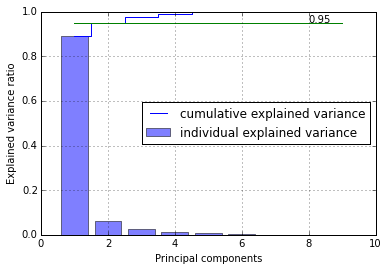

[[-75.71424916  35.95494354]
 [-82.35846646 -28.90955895]
 [-74.63022933  67.90963328]
 ..., 
 [ 32.11298721  -3.37922193]
 [-80.21409513  14.19059537]
 [-81.30834662 -21.6230423 ]]


In [3]:
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/pima-indians-diabetes/pima-indians-diabetes.data'
df = pd.read_csv(url, header=None)

# classification = df[8].values
# X=df.drop(8, axis=1) # I found similar results if drop the classification column. 

X= df - df.mean()   # PCA will automatically remove mean in fact.

# PCA
pca= PCA()
X_pca = pca.fit_transform(X)
var_exp = pca.explained_variance_ratio_ 

cum_var_exp = np.cumsum(var_exp)
print("Cummulative Variance Explained:")
print(cum_var_exp)

plt.figure()
plt.bar(range(1,10), var_exp, alpha=0.5, align='center',label='individual explained variance')
plt.step(range(1,10), cum_var_exp, where='mid', label='cumulative explained variance')
plt.plot(range(1,10), [0.95 for i in range(1,10)])
plt.annotate(0.95, (8,0.95))
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='center right')
plt.grid()
plt.show()

X_pca = X_pca[:,:2]
print(X_pca)


The first five componets has cummulative explained variance of over 99%.
So use the first five components in K-means Clustering.

## Tast 2 . K-means clustering
### 2.1. Compare different clustering result

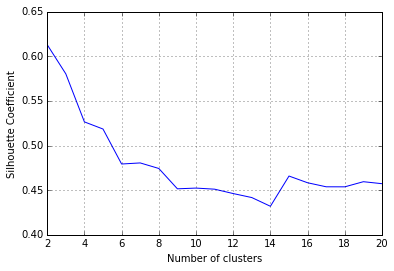

In [4]:
# calculate SC for K=1 through K=20
k_range = range(2, 21)
scores = []
for k in k_range:
    km = KMeans(n_clusters=k, random_state=1)
    km.fit(X_pca)
    scores.append(metrics.silhouette_score(X_pca, km.labels_))
    
# plot the results
plt.plot(k_range, scores)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Coefficient')
plt.grid(True)


Similar results can be found using other initial random state. 


### 2.2: Plot best result in scatter graph 
Silhouette shows K=2 is the best.

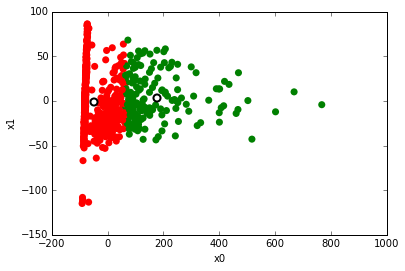

In [6]:
# K-means with K clusters
K = 2
km = KMeans(n_clusters=K, random_state=100)
km.fit(X_pca)


colors = np.array(['red', 'green','blue'])

# scatter plot of attribut 1 versus 2, colored by cluster (0=red, 1=green)

plt.scatter(X_pca[:,0], X_pca[:,1], c=colors[km.labels_], linewidths=0, s=50)

# cluster centers, marked by "."
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], linewidths=2, s=50, c='white')

# add labels
plt.xlabel('x0')
plt.ylabel('x1')

## Tast 3 .  Gaussian mixture model for clustering
### 3.1. Compare different clustering result

Use the first two components found in Task 1

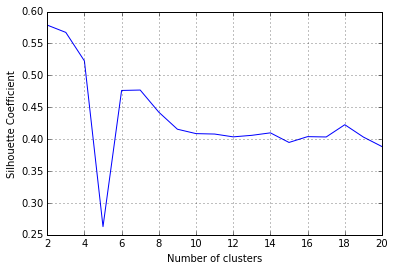

In [11]:
# calculate SC for K=1 through K=20
k_range = range(2, 21)
scores = []
for k in k_range:
    gmm = GMM(n_components=k, random_state=2,covariance_type='spherical')
    gmm.fit(X_pca)
    scores.append(metrics.silhouette_score(X_pca, gmm.predict(X_pca)))
    
# plot the results
plt.plot(k_range, scores)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Coefficient')
plt.grid(True)

### 3.2. Plot best result in scatter graph

From the silhouette score, 2-cluster seems best.

Converged: True


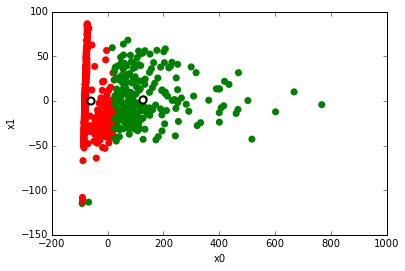

In [12]:
gmm = GMM(n_components=2, random_state=2,covariance_type='spherical')
gmm.fit(X_pca)
labels = gmm.predict(X_pca)

print("Converged: "+ str(gmm.converged_))

colors = np.array(['red', 'green', 'blue'])

# scatter plot of attribut 1 versus 2, colored by cluster (0=red, 1=green)

plt.scatter(X_pca[:,0], X_pca[:,1], c=colors[labels], linewidths=0, s=50)

# cluster centers, marked by "."
plt.scatter(gmm.means_[:,0], gmm.means_[:,1], linewidths=2, s=50, c='white')

# add labels
plt.xlabel('x0')
plt.ylabel('x1')

## Tast 4 .   Variational Bayesian Gaussian mixture model (VBGMM)  for clustering
### 4.1. Compare different clustering result



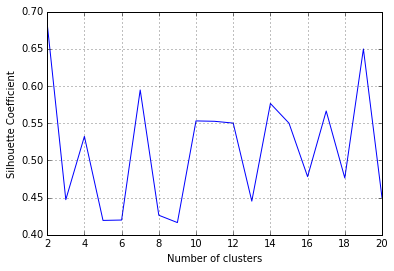

In [28]:
# calculate SC for K=1 through K=20
k_range = range(2, 21)
scores = []
for k in k_range:
    gmm = VBGMM(n_components=k, random_state=3,n_iter=10,covariance_type='spherical')
    gmm.fit(X_pca)
    scores.append(metrics.silhouette_score(X_pca, gmm.predict(X_pca)))
    
# plot the results
plt.plot(k_range, scores)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Coefficient')
plt.grid(True)

### 4.2. Plot best result in scatter graph

From the silhouette score, 2-cluster seems best.

**covariance_type='spherical'** helps to make the model converged.


Converged: True


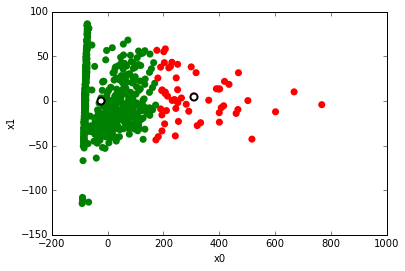

In [26]:
gmm = VBGMM(n_components=2, random_state=2,n_iter = 10,covariance_type='spherical')
gmm.fit(X_pca)
labels = gmm.predict(X_pca)
print("Converged: "+ str(gmm.converged_))

colors = np.array(['red', 'green', 'blue'])

# scatter plot of attribut 1 versus 2, colored by cluster (0=red, 1=green)

plt.scatter(X_pca[:,0], X_pca[:,1], c=colors[labels], linewidths=0, s=50)

# cluster centers, marked by "."
cluster0 = []
cluster1 = []

for i in range(len(X_pca)):
    if labels[i]==0:
        cluster0.append(X_pca[i])
    if labels[i]==1:
        cluster1.append(X_pca[i])

centers=[]
centers.append(np.asarray(cluster0).mean(axis=0));
centers.append(np.asarray(cluster1).mean(axis=0));

centers = (np.asarray(centers))
plt.scatter(centers[:,0], centers[:,1], linewidths=2, s=50, c='white')

# add labels
plt.xlabel('x0')
plt.ylabel('x1')

## Tast 5.  Process Gaussian mixture model (DPGMM)
### 5.1 Compare different clustering result



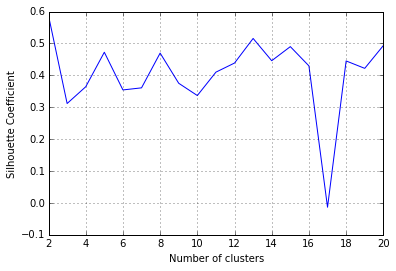

In [40]:
# calculate SC for K=1 through K=20
k_range = range(2, 21)
scores = []
for k in k_range:
    gmm = DPGMM(n_components=k, random_state=2,n_iter=10,covariance_type='spherical')
    gmm.fit(X_pca)
    scores.append(metrics.silhouette_score(X_pca, gmm.predict(X_pca)))
    
# plot the results
plt.plot(k_range, scores)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Coefficient')
plt.grid(True)

### 5.2. Plot best result in scatter graph

From the silhouette score of several different random state, 2-cluster seems best.


Converged: True


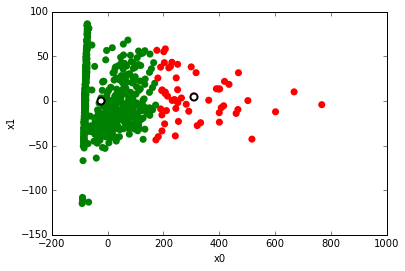

In [41]:
gmm = VBGMM(n_components=2, random_state=2,covariance_type='spherical')
gmm.fit(X_pca)
labels = gmm.predict(X_pca)
print("Converged: "+ str(gmm.converged_))


colors = np.array(['red', 'green', 'blue', 'grey'])

# scatter plot of attribut 1 versus 2, colored by cluster (0=red, 1=green)

plt.scatter(X_pca[:,0], X_pca[:,1], c=colors[labels], linewidths=0, s=50)

# cluster centers, marked by "."
cluster0 = []
cluster1 = []

for i in range(len(X_pca)):
    if labels[i]==0:
        cluster0.append(X_pca[i])
    if labels[i]==1:
        cluster1.append(X_pca[i])


centers=[]
centers.append(np.asarray(cluster0).mean(axis=0));
centers.append(np.asarray(cluster1).mean(axis=0));

centers = (np.asarray(centers))
plt.scatter(centers[:,0], centers[:,1], linewidths=2, s=50, c='white')

# add labels
plt.xlabel('x0')
plt.ylabel('x1')

## Tast 6 .  compare the clustering results using silhouette score or pdist obtained from K-means, Gaussian mixture model, VBGMM and DPGMM. 

All the four clustering algorithms or models achieve the best silhouette score with 2 clusters.
That is consistent with the data source which has two classifications.

VBGMM has the highest silhouette score (about 0.67)